# Assignment 1

## This is a simple introduction to machine learning. Our goal is to train a emotional state classifier

## Marks will be awarded as follows:

## If performance on test data exceeds 25 percentile, 9.5/10 marks will be awarded
## If performance on test data tops the class, 10/10 marks will be awarded
## If performance on test data drops below 25 percentile, 9.5-X marks will be awarded, where X=(Z-Y)/3, with Y being the algorithm accuracy and Z being the 25th percentile accuracy

## Facial expression data is modified from https://www.kaggle.com/c/3364

### A csv file with facial expression data is provided.


In [ ]:
# Install libraries 
!pip install opencv-python==4.2.0.34 
!pip install pandas
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import cv2
data_path = 'dataForClass.csv'
image_size=(48,48)

def load_data(data_path):
        data = pd.read_csv(data_path)
        pixels = data['pixels'].tolist()
        width, height = 48, 48
        faces = []
        for pixel_sequence in pixels:
            face = [int(pixel) for pixel in pixel_sequence.split(' ')]
            face = np.asarray(face).reshape(width, height)
            face = cv2.resize(face.astype('uint8'),image_size)
            faces.append(face.astype('float32'))
        faces = np.asarray(faces)
        faces = np.expand_dims(faces, -1)

        emotions = pd.get_dummies(data['emotion']).values
        return faces, emotions
    
faces, emotions = load_data(data_path); 

### A sample face

Emotion Labels [1 0 0 0 0 0]


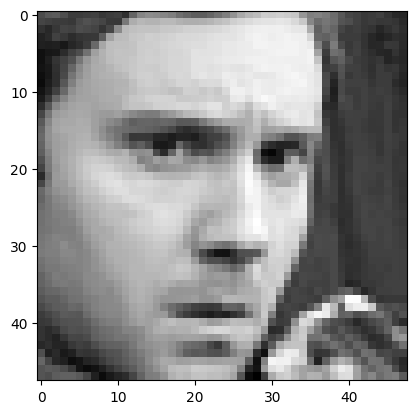

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
ind = 0
f = faces[ind, :,:,0]
print('Emotion Labels', emotions[ind,:])
plt.imshow(f, cmap='gray')

/common/home/users/c/cskang.2020/jupyterlab-venv-tf/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


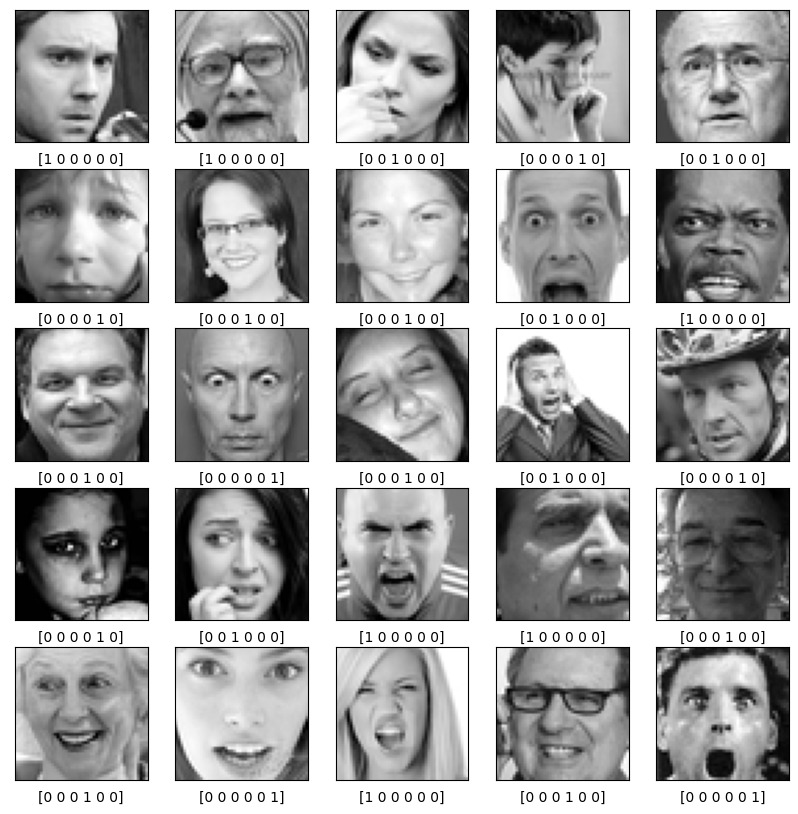

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))

# Show first 25 training images below
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(faces[i, :, :, 0], cmap='gray')
    plt.xlabel(emotions[i,:])

In [4]:
faces.shape, emotions.shape

((23744, 48, 48, 1), (23744, 6))

### Building CNN

In [ ]:
# Install libraries

!pip install --upgrade pip
%pip install scipy

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# Write your code here 

# ****** Model Implementation ******

# Construct a sequential model
model = models.Sequential()

# Input layer
model.add(Conv2D(filters = 64,kernel_size = (5, 5),input_shape = (48, 48, 1),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())


model.add(Conv2D(filters = 64,kernel_size = (5, 5),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 512,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512,kernel_size = (3, 3),activation = 'relu',padding = 'same',kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten(name='flatten'))       
model.add(Dense(512,activation='relu',kernel_initializer='he_normal',))
model.add(BatchNormalization())   
model.add(Dropout(0.6))
model.add(Dense(6,activation='softmax'))
# ************** End **************


In [ ]:
model.summary()

In [25]:
# ********* Model Training *********

# Hyperparameter initial setup

# Define batch size : 32
train_batchsize = 32
validation_batchsize = 32

# Data generation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = datagen.flow(
    x = faces,
    y = emotions,
    shuffle = True,
    batch_size=train_batchsize,
    subset='training') # set as training data

validation_generator = datagen.flow(
    x = faces,
    y = emotions,
    batch_size=validation_batchsize,
    subset='validation') # set as validation data

# Define optimizer : Adam optimizer
# Define initial learning rate : 0.0005
optim = tf.keras.optimizers.Adam(learning_rate=0.0005) 

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

# ************** End **************


In [26]:
# Save the best model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='submission_model/KangChinShen.h5', 
    mode='max', 
    monitor='val_acc', 
    verbose=2, 
    save_best_only=True)

callbacks_list = [checkpoint]


# 1st training round
# Define initial epoch number : 100
epochs = 100

# Start training
model.fit(
      train_generator,
      steps_per_epoch=train_generator.n/train_generator.batch_size ,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.n/validation_generator.batch_size,
      verbose=1,
      callbacks=callbacks_list)

# ************** End **************

Epoch 1/100


2023-02-05 10:38:15.901918: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_30/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


592/593 [============================>.] - ETA: 0s - loss: 2.3696 - acc: 0.2301
Epoch 1: val_acc improved from -inf to 0.31024, saving model to submission_model/KangChinShen.h5
593/593 [==============================] - 20s 22ms/step - loss: 2.3680 - acc: 0.2302 - val_loss: 1.6656 - val_acc: 0.3102
Epoch 2/100
591/593 [============================>.] - ETA: 0s - loss: 1.8553 - acc: 0.2633
Epoch 2: val_acc did not improve from 0.31024
593/593 [==============================] - 12s 21ms/step - loss: 1.8541 - acc: 0.2636 - val_loss: 1.7245 - val_acc: 0.3102
Epoch 3/100
593/593 [============================>.] - ETA: 0s - loss: 1.6915 - acc: 0.3020
Epoch 3: val_acc improved from 0.31024 to 0.32266, saving model to submission_model/KangChinShen.h5
593/593 [==============================] - 13s 21ms/step - loss: 1.6914 - acc: 0.3020 - val_loss: 1.6962 - val_acc: 0.3227
Epoch 4/100
592/593 [============================>.] - ETA: 0s - loss: 1.5865 - acc: 0.3457
Epoch 4: val_acc improved from 0

In [27]:
# *** Hyperparameter Tuning ***

# 2nd training round

# Decrease the learning rate : 0.0001 (from 0.0005)
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.0001)

# Decrease the epoch number : 100 (from 250)
epochs = 100


model.fit(
      train_generator,
      steps_per_epoch=train_generator.n/train_generator.batch_size ,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.n/validation_generator.batch_size,
      verbose=1,
      callbacks=callbacks_list)
# ************** End **************

Epoch 1/100
594/593 [==============================] - ETA: 0s - loss: 0.5264 - acc: 0.8007
Epoch 1: val_acc improved from 0.70872 to 0.71988, saving model to submission_model/KangChinShen.h5
593/593 [==============================] - 12s 20ms/step - loss: 0.5264 - acc: 0.8007 - val_loss: 0.7980 - val_acc: 0.7199
Epoch 2/100
591/593 [============================>.] - ETA: 0s - loss: 0.5086 - acc: 0.8050
Epoch 2: val_acc did not improve from 0.71988
593/593 [==============================] - 12s 20ms/step - loss: 0.5087 - acc: 0.8051 - val_loss: 0.8217 - val_acc: 0.7112
Epoch 3/100
594/593 [==============================] - ETA: 0s - loss: 0.4954 - acc: 0.8110
Epoch 3: val_acc did not improve from 0.71988
593/593 [==============================] - 12s 20ms/step - loss: 0.4954 - acc: 0.8110 - val_loss: 0.8220 - val_acc: 0.7127
Epoch 4/100
591/593 [============================>.] - ETA: 0s - loss: 0.4962 - acc: 0.8111
Epoch 4: val_acc did not improve from 0.71988
593/593 [================

In [30]:
# *** Hyperparameter Tuning ***

# 3rd training round

# Decrease the learning rate : 0.00005 (from 0.0001)
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.00005)

# Decrease the epoch number : 50 (from 100)
epochs = 50


model.fit(
      train_generator,
      steps_per_epoch=train_generator.n/train_generator.batch_size ,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.n/validation_generator.batch_size,
      verbose=1,
      callbacks=callbacks_list)

# ************** End **************

Epoch 1/50
592/593 [============================>.] - ETA: 0s - loss: 0.3220 - acc: 0.8793
Epoch 1: val_acc did not improve from 0.72957
593/593 [==============================] - 13s 22ms/step - loss: 0.3220 - acc: 0.8793 - val_loss: 0.9237 - val_acc: 0.7279
Epoch 2/50
592/593 [============================>.] - ETA: 0s - loss: 0.3200 - acc: 0.8790
Epoch 2: val_acc did not improve from 0.72957
593/593 [==============================] - 13s 22ms/step - loss: 0.3194 - acc: 0.8792 - val_loss: 0.9511 - val_acc: 0.7167
Epoch 3/50
593/593 [============================>.] - ETA: 0s - loss: 0.3187 - acc: 0.8818
Epoch 3: val_acc did not improve from 0.72957
593/593 [==============================] - 13s 22ms/step - loss: 0.3188 - acc: 0.8817 - val_loss: 0.9630 - val_acc: 0.7112
Epoch 4/50
592/593 [============================>.] - ETA: 0s - loss: 0.3194 - acc: 0.8795
Epoch 4: val_acc did not improve from 0.72957
593/593 [==============================] - 13s 22ms/step - loss: 0.3192 - acc: 0.87

### Final Performace Statistics

Final (best) validation accuracy  during training :  ___72.957%___

### Save the model

In [32]:
# save your model and weight (only submit best model)
model_json = model.to_json()


with open("KangChinShen.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('KangChinShen_weights.h5')

### Test the model (for personal analysis)

In [3]:
# Import Tensorflow for testing
import tensorflow as tf

# Define the optimizer for testing
optim_test = tf.keras.optimizers.Adam(learning_rate=0.0005) 


with open('KangChinShen.json', 'r') as json_file:
    json_savedModel= json_file.read()    

test_model = tf.keras.models.model_from_json(json_savedModel)
test_model.summary()


test_model.compile(loss='categorical_crossentropy',
              optimizer=optim_test,
              metrics=['acc'])

# Load weights into the new model
test_model.load_weights('KangChinShen_weights.h5')

## Testing
test_loss, test_acc = test_model.evaluate(faces/255.0, emotions) 
print('Test accuracy:', test_acc)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization_55 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_51 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_56 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                      

#### ------------------------------------------------------------------------- END OF ASSIGNMENT 1 ---------------------------------------------------------------------

---
---
---
---
--- 
### Test the model (professor's evaluation)

In [ ]:
# Your model will be tested as following

# Model reconstruction from JSON file
with open('KangChinShen.json', 'r') as json_file:
    json_savedModel= json_file.read()

test_model = tf.keras.models.model_from_json(json_savedModel)
test_model.summary()

test_model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

# Load weights into the new model
test_model.load_weights('KangChinShen_weights.h5')

In [ ]:
## Testing


## *** Define the faces_test here
## *** Define the emotions_test here

test_loss, test_acc = test_model.evaluate(faces_test/255.0, emotions_test) 
print('Test accuracy:', test_acc)